# РК №2, Акимкин М.Г., ИУ5ц-82Б, Вариант №26.

### Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore')
sns.set(style="ticks")
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error,  median_absolute_error, r2_score 

In [2]:
data = pd.read_csv('Stars.csv')

In [3]:
data['R'] = data['R'].astype(int)
data['L'] = data['L'].astype(int)
le = LabelEncoder()
le.fit(data.Color.drop_duplicates()) 
data.Color = le.transform(data.Color)
le = LabelEncoder()
le.fit(data.Spectral_Class.drop_duplicates()) 
data.Spectral_Class = le.transform(data.Spectral_Class)

In [4]:
data.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0,0,16.12,8,5,0
1,3042,0,0,16.60,8,5,0
2,2600,0,0,18.70,8,5,0
3,2800,0,0,16.65,8,5,0
4,1939,0,0,20.06,8,5,0


In [5]:
data.dtypes

Temperature         int64
L                   int64
R                   int64
A_M               float64
Color               int64
Spectral_Class      int64
Type                int64
dtype: object

In [6]:
data.isnull().sum()
# проверим есть ли пропущенные значения

Temperature       0
L                 0
R                 0
A_M               0
Color             0
Spectral_Class    0
Type              0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     240 non-null    int64  
 1   L               240 non-null    int64  
 2   R               240 non-null    int64  
 3   A_M             240 non-null    float64
 4   Color           240 non-null    int64  
 5   Spectral_Class  240 non-null    int64  
 6   Type            240 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 13.2 KB


In [8]:
data.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0,0,16.12,8,5,0
1,3042,0,0,16.60,8,5,0
2,2600,0,0,18.70,8,5,0
3,2800,0,0,16.65,8,5,0
4,1939,0,0,20.06,8,5,0


<AxesSubplot:>

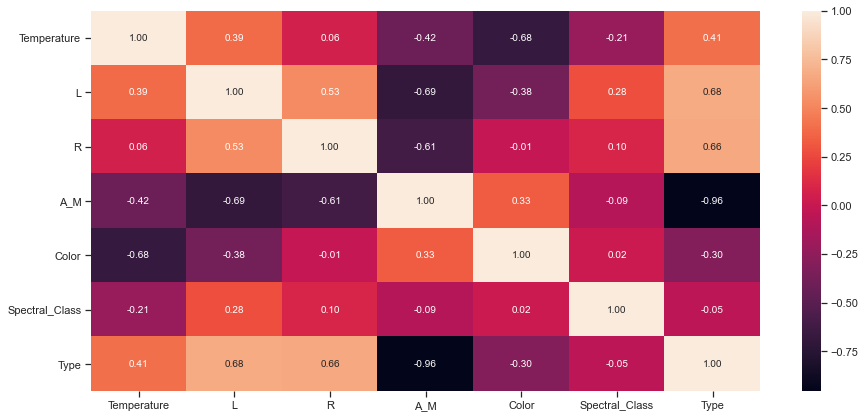

In [9]:
#Построим корреляционную матрицу
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(data.corr(method='pearson'), ax=ax, annot=True, fmt='.2f')

In [10]:
X = data.drop(['R','Color','Spectral_Class','L','R', 'Type','Temperature'], axis = 1)
Y = data.Type
print('Входные данные:\n\n', X.head(), '\n\nВыходные данные:\n\n', Y.head())

Входные данные:

      A_M
0  16.12
1  16.60
2  18.70
3  16.65
4  20.06 

Выходные данные:

 0    0
1    0
2    0
3    0
4    0
Name: Type, dtype: int64


In [11]:
X_train,  X_test,  Y_train,  Y_test = train_test_split(X,  Y, random_state = 0, test_size = 0.1)
print('Входные параметры обучающей выборки:\n\n',X_train.head(), \
      '\n\nВходные параметры тестовой выборки:\n\n', X_test.head(), \
      '\n\nВыходные параметры обучающей выборки:\n\n', Y_train.head(), \
      '\n\nВыходные параметры тестовой выборки:\n\n', Y_test.head())

Входные параметры обучающей выборки:

         A_M
5    16.980
22   14.230
199  14.776
97    2.440
12   13.210 

Входные параметры тестовой выборки:

        A_M
109  -5.79
71   10.12
37    2.93
74   10.89
108  -6.24 

Выходные параметры обучающей выборки:

 5      0
22     2
199    1
97     3
12     1
Name: Type, dtype: int64 

Выходные параметры тестовой выборки:

 109    4
71     1
37     3
74     1
108    4
Name: Type, dtype: int64


In [12]:
from sklearn.svm import SVC , LinearSVC
from sklearn.datasets.samples_generator import make_blobs
from matplotlib import pyplot as plt

In [13]:
svc = SVC(kernel='linear')
svc.fit(X_train,Y_train)

SVC(kernel='linear')

In [14]:
pred_y = svc.predict(X_test)

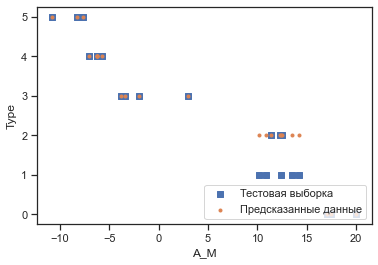

In [15]:
plt.scatter(X_test.A_M, Y_test,    marker = 's', label = 'Тестовая выборка')
plt.scatter(X_test.A_M, pred_y, marker = '.', label = 'Предсказанные данные')
plt.legend (loc = 'lower right')
plt.xlabel ('A_M')
plt.ylabel ('Type')
plt.show()

In [16]:
from sklearn.ensemble import RandomForestRegressor

In [17]:
forest_1 = RandomForestRegressor(n_estimators=5, oob_score=True, random_state=10)
forest_1.fit(X, Y)

RandomForestRegressor(n_estimators=5, oob_score=True, random_state=10)

In [18]:
Y_predict = forest_1.predict(X_test)
print('Средняя абсолютная ошибка:',   mean_absolute_error(Y_test, Y_predict))
print('Средняя квадратичная ошибка:', mean_squared_error(Y_test, Y_predict))
print('Median absolute error:',       median_absolute_error(Y_test, Y_predict))
print('Коэффициент детерминации:',    r2_score(Y_test, Y_predict))

Средняя абсолютная ошибка: 0.08611111111111112
Средняя квадратичная ошибка: 0.05574074074074076
Median absolute error: 0.0
Коэффициент детерминации: 0.9790426457789382


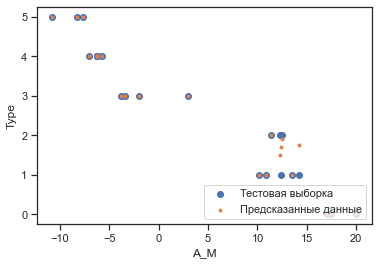

In [19]:
plt.scatter(X_test.A_M, Y_test,    marker = 'o', label = 'Тестовая выборка')
plt.scatter(X_test.A_M, Y_predict, marker = '.', label = 'Предсказанные данные')
plt.legend(loc = 'lower right')
plt.xlabel('A_M')
plt.ylabel('Type')
plt.show()